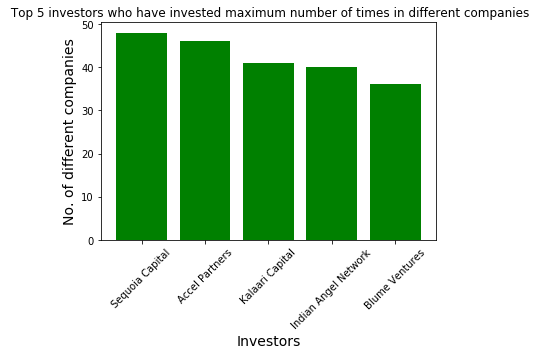

Sequoia Capital 48
Accel Partners 46
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
with open('datasets/startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    startup=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                if i.strip()!='':
                    investors.append(i.strip())
                    startup.append(row['StartupName'])
    for i in range(len(startup)):
        if 'Ola' in startup[i]:
            startup[i]='Ola'
        if 'Flipkart' in startup[i]:
            startup[i]='Flipkart'
        if 'Oyo' in startup[i] or 'OYO Rooms' in startup[i]:
            startup[i]='Oyo'
        if 'Paytm' in startup[i]:
            startup[i]='Paytm'
    np_startup=np.array(startup)
    np_investors=np.array(investors)
    dic=dict()
    for i in range(len(np_startup)):
        s=set()
        if np_investors[i] in dic.keys():
            dic[np_investors[i]].add(np_startup[i])
        else:
            s.add(np_startup[i])
            dic[np_investors[i]]=s
    d=dict()
    for i in dic.keys():
        if i in d.keys():
            d[i]+=len(dic[i])
        else:
            d[i]=len(dic[i])
    x=[]
    y=[]
    for i in d.keys():
        x.append(i)
        y.append(d[i])
    np_x=np.array(x)
    np_y=np.array(y)
    
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
    np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]
    
    plt.bar(np_x, np_y, color='green')
    plt.xlabel('Investors', size=14)
    plt.ylabel('No. of different companies', size=14)
    plt.title(' Top 5 investors who have invested maximum number of times in different companies', size=12)
    plt.xticks(rotation=45)
    plt.show()
    
    for i in range(len(np_x)):
        print(np_x[i], np_y[i])